# Homework 6
Eric Gagliano (egagli)

## Problem 1: Continuous Bayesian Estimation of Flood Frequency

The “100 year storm” is a storm with a rainfall total that would on average be met or exceeded only once every 100 years, and therefore the storm has a 0.01 chance of occurrence each year. For any “k-year storm”, its probability of occurrence in one year is 1/k, where k is the return period in years. Infrastructure is often designed to handle the flooding due to some k-year storm.

Based on long-term climate records for New York City, the 24-hour duration, 100-year return period rainfall was previously estimated at 7.2 inches. This “7.2 inches in 24 hours” storm (the “100 year storm”) has been used to design infrastructure in New York City. When this design limit is exceeded, flooding can occur. If you are interested in

During the 20th century, this limit was exceeded only once, during Hurricane Floyd in 1999. However, a storm in 2007 produced 8 inches of rainfall in a 24-hour period. Another storm in August 2011 again exceeded 7.2 inches in 24 hours. Hurricane Irene in September 2011 exceeded this limit yet again, and so did Hurricane Sandy in October 2012. This happened again in September 2018 from Hurricane Florence, and then Hurricane Ida broke rain records in September 2021. The table below summarizes the time periods and the number of times this design limit was exceeded within each time period.

Note that unlike what you will do in many hydrology classes, which is to calculate the return period across a range of different precipitation or streamflow values, we are focusing here only on the probability of 24-hour storms exceeding 7.2 inches of rainfall because this is a critical design number for New York City. If you are interested in city planning in New York around floods, they released a design plan in May 2021. Note they use different rain thresholds for different design elements (e.g., sometimes hourly rain rates matter more), so the actual critical design numbers vary more than what we're examining here.

| time period | # of years |# of storms |
|----|------|---|
|1900-1999	|100	|1	|
|2000-2009|	10	|1	|
|2010-2019	|10|	4	|
|2020-2021	|2|	1	|

In this problem we will use Bayes' Theorem to see if the 7.2-inch storm is still a 100-year storm. In other words, we want to find what k-year storm 7.2 inches in 24 hours corresponds to, if not 100-years.

### A. Download and plot the prior pdf of a >=7.2-inch storm occurring in a given year from the data file NYC_precip_priors.csv. This dataset shows the prior distribution of the chance that New York City will get a 7.2-inch storm in a given year, which has a mean p = 0.01, corresponding to 100 years (1/p = 1/0.01 = 100).

(Note that the variable labeled “PDF” represents the probability of the storm frequency (or return period) falling within that interval and therefore includes the interval width, such that the sum of the pdf values alone equals 1, and the cumulative sum of the pdf is equal to the cdf.)

There is some uncertainty about the original likelihood, so we want to determine:

- What are the mean and 95% confidence interval of the probability, i.e., where does 95% of the PDF fall between?
- To what k-year storm (expected return period) range do these values correspond?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# read in data file
nyc_precip_file = 'NYC_precip_priors.csv'
nyc_precip = pd.read_csv(nyc_precip_file,skiprows=0,header=1)

In [3]:
# calculate the cdf
nyc_precip['CDF'] = nyc_precip['PDF'].cumsum()

Text(0.5, 1.0, 'Storm CDF vs Storm Probability')

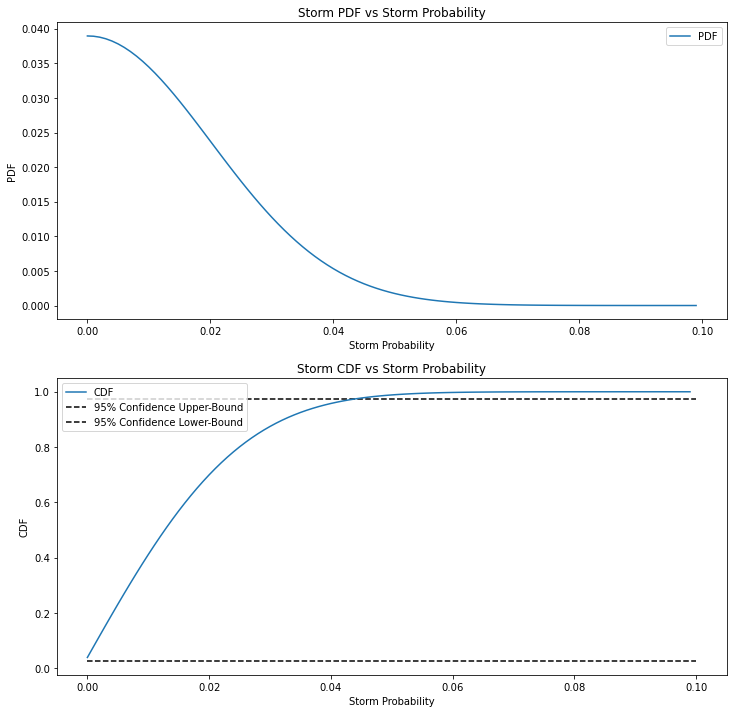

In [4]:
# plot the PDF and CDF
f,ax=plt.subplots(2,1,figsize=(12,12))
nyc_precip.plot(x='Storm Probability',y='PDF',ax=ax[0])
ax[0].set_ylabel('PDF')
ax[0].set_title('Storm PDF vs Storm Probability')
ax[0].legend()
nyc_precip.plot(ax=ax[1],x='Storm Probability',y='CDF')
ax[1].hlines(.975,0,.1,linestyles='dashed',color='k',label='95% Confidence Upper-Bound')
ax[1].hlines(.025,0,.1,linestyles='dashed',color='k',label='95% Confidence Lower-Bound')
ax[1].legend()
ax[1].set_ylabel('CDF')
ax[1].set_title('Storm CDF vs Storm Probability')

In [5]:
# calculate prior expected and confidence interval
prior_expected = np.sum(nyc_precip['PDF'] * nyc_precip['Storm Probability'])
f = scipy.interpolate.interp1d(nyc_precip['CDF'], nyc_precip['Storm Probability'])
upper = f(0.975)
#lower = f(0.025)
lower = 0
print(f'Our mean expected value is {prior_expected:.2} and the 95% confidence interval is {lower} - {upper:.2}. (Since the CDF starts at 0.04 for a storm probability of 0, we must adjust our interval accordingly)')
print(f'The corresponding k-year storm is {1/prior_expected:0.3} years')

Our mean expected value is 0.016 and the 95% confidence interval is 0 - 0.044. (Since the CDF starts at 0.04 for a storm probability of 0, we must adjust our interval accordingly)
The corresponding k-year storm is 63.8 years


### B. Apply Bayes' Theorem at each time period of interest (see table above) to update the the pdf for the 7.2-inch storm.

P(A|B) = P(B|A) * P(A) / P(B)

In this problem, A is the true likelihood of the storm's occurrence, and B are the events we have observed. For the first time period, use the pdf from the data file as the prior pdf, P(A). For each subsequent time period, use the posterior pdf from the previous time period. The likelihood P(B|A = p) that the storm would be exceeded m times in n years (event B) for a storm probability p (event A = p) is given by: P(B|A = p) = scipy.stats.binom.pmf(m,n,p), where m is the number of storms, and n is the number of years.

- Calculate and plot the posterior pdfs of the 7.2-inch storm's probability after each time period.
- Calculate the the mean and 95% confidence interval of the return period each time.

In [6]:
# setup table inputs
m_frequency = np.array([1,1,4,1])
n_years = np.array([100,10,10,2])
dates = ['1900-1999','2000-2009','2010-2019','2020-2021']
p = nyc_precip['PDF']
post_upper = np.zeros(4,dtype='float')
post_lower = np.zeros(4,dtype='float')
post_expected =  np.zeros(4,dtype='float')

In [7]:
# print priors
print(f'Before any update:')
print(f'expected value of return period = {np.round(prior_expected,5)} ({np.round(1/prior_expected,5)} year flood)')
print(f'upper = {np.round(upper,5)} ({np.round(1/upper,5)} year flood)')
print(f'lower = {np.round(lower,5)} (Inf year flood)')
print('')

Before any update:
expected value of return period = 0.01568 (63.77872 year flood)
upper = 0.04425 (22.59852 year flood)
lower = 0 (Inf year flood)



After the 1900-1999 Update:
expected value of return period = 0.02242 (44.60183 year flood)
upper = 0.04328 (23.10307 year flood)
lower = 0.00043 (2301.11313 year flood)

After the 2000-2009 Update:
expected value of return period = 0.02293 (43.61945 year flood)
upper = 0.03771 (26.51992 year flood)
lower = 0.00082 (1221.859 year flood)

After the 2010-2019 Update:
expected value of return period = 0.02084 (47.97817 year flood)
upper = 0.03022 (33.09433 year flood)
lower = 0.01182 (84.62185 year flood)

After the 2020-2021 Update:
expected value of return period = 0.02028 (49.31837 year flood)
upper = 0.02833 (35.29755 year flood)
lower = 0.01604 (62.35693 year flood)



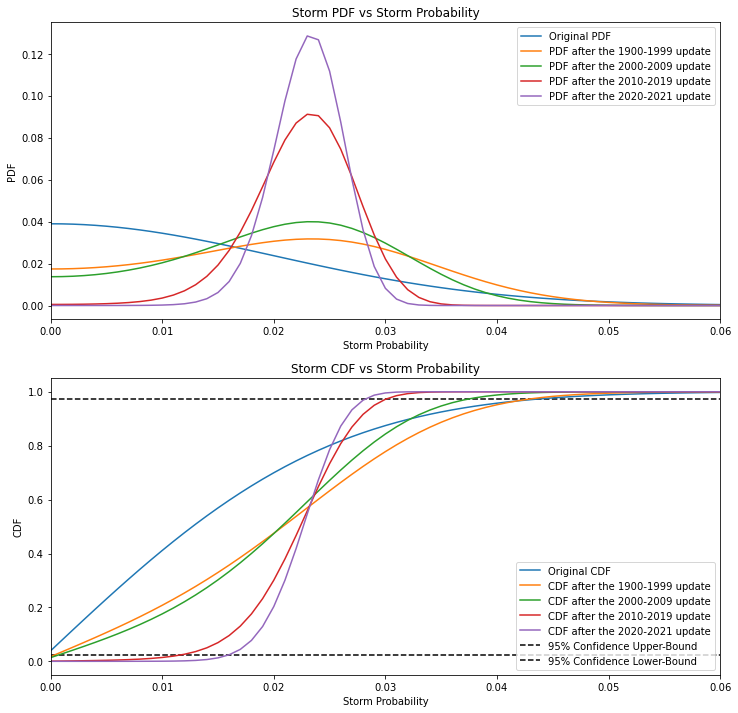

In [8]:
# plot posterior pdfs and cdfs
f,ax=plt.subplots(2,1,figsize=(12,12))
nyc_precip.plot(x='Storm Probability',y='PDF',label='Original PDF',ax=ax[0])
nyc_precip.plot(ax=ax[1],x='Storm Probability',y='CDF',label='Original CDF')

for i,(m,n) in enumerate(zip(m_frequency,n_years)):
    
    likelihood = scipy.stats.binom.pmf(m,n,p)
    likelihood_prior = likelihood*p
    # this gives us P(A|B)
    post_pdf = likelihood_prior / np.nansum(likelihood_prior)
    post_cdf = np.cumsum(post_pdf)
    f = scipy.interpolate.interp1d(post_cdf, nyc_precip['Storm Probability'])
    post_upper[i] = f(0.975)
    post_lower[i] = f(0.025)
    post_expected[i] = np.sum(post_pdf * nyc_precip['PDF'])
    
    print(f'After the {dates[i]} Update:')
    print(f'expected value of return period = {np.round(post_expected[i],5)} ({np.round(1/post_expected[i],5)} year flood)')
    print(f'upper = {np.round(post_upper[i],5)} ({np.round(1/post_upper[i],5)} year flood)')
    print(f'lower = {np.round(post_lower[i],5)} ({np.round(1/post_lower[i],5)} year flood)')
    print('')
    
    ax[0].plot(nyc_precip['Storm Probability'],post_pdf,label=f'PDF after the {dates[i]} update')
    ax[1].plot(nyc_precip['Storm Probability'],post_cdf,label=f'CDF after the {dates[i]} update')
    p = post_pdf
    
ax[0].set_ylabel('PDF')
ax[0].set_title('Storm PDF vs Storm Probability')
ax[1].hlines(.975,0,.06,linestyles='dashed',color='k',label='95% Confidence Upper-Bound')
ax[1].hlines(.025,0,.06,linestyles='dashed',color='k',label='95% Confidence Lower-Bound')
ax[1].set_ylabel('CDF')
ax[1].set_title('Storm CDF vs Storm Probability')
ax[0].set_xlim([0,0.06])
ax[1].set_xlim([0,0.06])
ax[0].legend()
ax[1].legend()

### C. How much did the mean and 95% confidence interval return period change from the original prior return period to 2021? What does this indicate about the “true” frequency of the 7.2-inch-storm? To what k-year storm does this mean correspond to now?

<ipython-input-9-e0d42c71bbba>:16: RuntimeWarning: divide by zero encountered in true_divide
  ax[1].plot(1/full_lower,label='95% Confidence Upper-Bound')


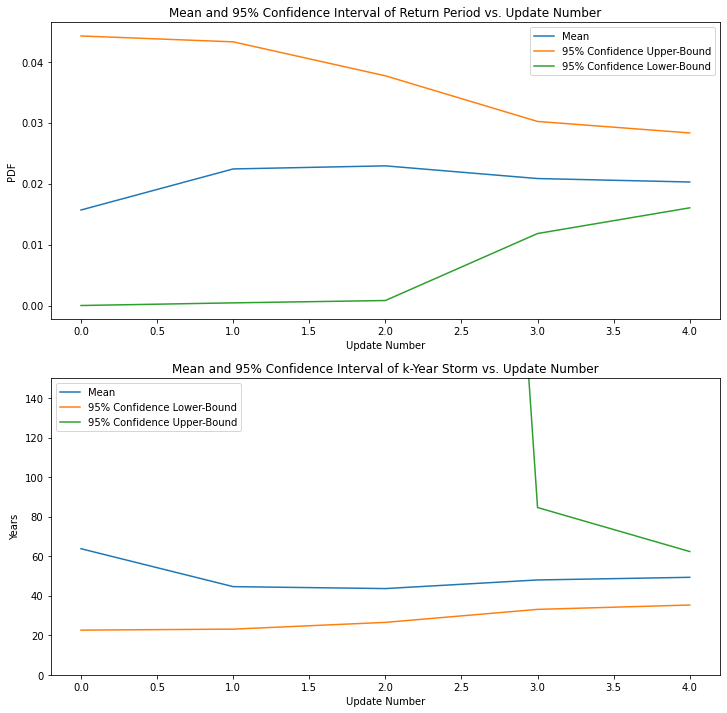

In [9]:
f,ax=plt.subplots(2,1,figsize=(12,12))
full_expected = np.append(prior_expected,post_expected)
full_upper = np.append(upper,post_upper)
full_lower = np.append(lower,post_lower)

ax[0].plot(full_expected,label='Mean')
ax[0].plot(full_upper,label='95% Confidence Upper-Bound')
ax[0].plot(full_lower,label='95% Confidence Lower-Bound')
ax[0].set_title('Mean and 95% Confidence Interval of Return Period vs. Update Number')
ax[0].set_xlabel('Update Number')
ax[0].set_ylabel('PDF')
ax[0].legend()

ax[1].plot(1/full_expected,label='Mean')
ax[1].plot(1/full_upper,label='95% Confidence Lower-Bound')
ax[1].plot(1/full_lower,label='95% Confidence Upper-Bound')
ax[1].set_title('Mean and 95% Confidence Interval of k-Year Storm vs. Update Number')
ax[1].set_xlabel('Update Number')
ax[1].set_ylabel('Years')
ax[1].set_ylim([0,150])
ax[1].legend()

The return period expected value using the original pdf was 0.01568 (0,0.04), and the final updated pdf had an expected value of 0.0203 (0.01604,0.02833). This indicates that with new data it looks like 100 year floods are becoming more likely. More precisely, the "100 year" flood was calculated using the prior distribution to be a 63.78 year flood, and with all of the updates the "100 year" flood corresponds to an actual 49.31 year flood.

## Problem 2: Project Update (CEWA 565)

Provide an update on your term project. By now you should have acquired all of the data you need for your term project.

### A. Create 2-3 plots that illustrate your data. These can be time-series plots, histograms, CDFs, whatever is relevant to your data and your problem.

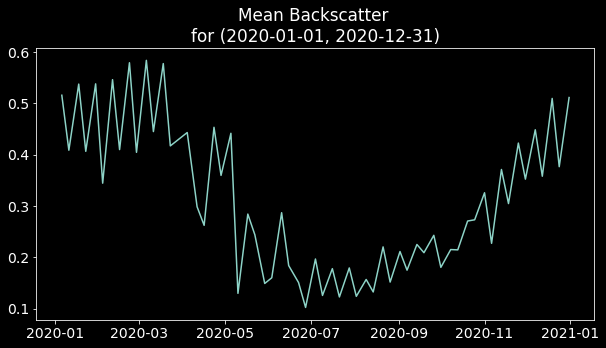

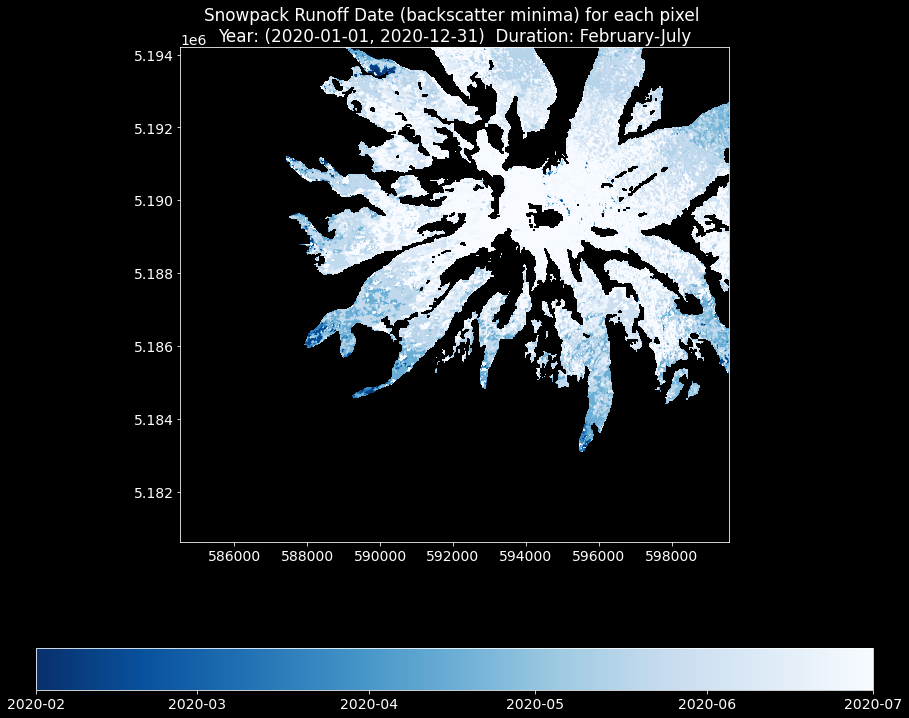

### B. Discuss the quality of your data. Do you need to take into account any erroneous values or uncertain numbers before you start your statistics?

Our data quality seems pretty good, however we will have to do a lot of sorting of images based on metadata such as orbit direction, time of day, incidence angle, etc. We don't expect many errornous values, but we might have to do some masking if we decide to constrain our analysis to glaciers.

### C. Write down at least two very specific questions that you will answer with your data. For each question, write down which statistical tools you will use to help answer it.

How does elevation effect snow melt timing? How does aspect effect snow melt timing? In order to answer both of these questions, we will sort pixels into elevation and aspect bins and then run an ANOVA test to see the variance in snow melt timing that can be attributed to different elevation and aspect bins. We might also want to ask if Mt Rainier snow melt timing is significantly different than other mountains in the Cascades. We would want to try out a 2 sample (and 2 tail) t test for this purpose.

### D. Based on what you have so far, do you think that your project scope is about right for a 10 page paper, or do you feel that you need to either simplify things to make it shorter or add complexity to make it longer? If you feel adjustments are needed, how to you plan to address this issue?

I feel like our scope is pretty reasonable for now, at this point whether we increase the scope depends on the scalability of our code.

### E. What do you anticipate being the most difficult parts of your term project? Do you have questions you would like help with or advice on? Write them here.

The most difficult part of this project will likely be dealing with the large quantities of data, as SAR images are large and take a lot of compute power to process and analyze. No questions for now, but will probably think of some soon :)

# References

Note: A large amount of this code is adapted from the CEWA 565 course materials, predominantly from the lab 6 jupyter notebook which can be found in module 6 of the class website: https://mountain-hydrology-research-group.github.io/data-analysis/modules/module6.html